In [27]:
import asyncio
import aiohttp
import requests
import json
import time
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
async def make_request(session, url):
    async with session.get(url) as response:
        return await response.text()

async def sim_calls(num_requests):
    url = "http://10.171.9.221:5000/home"
    results = defaultdict(lambda :0)

    async with aiohttp.ClientSession() as session:
        tasks = [make_request(session, url) for _ in range(num_requests)]
        responses = await asyncio.gather(*tasks)

    for response in responses:
        #print(response)
        server = json.loads(response)["message"].split(":")[-1].strip()
        results[server] += 1

    print("Requests handled by each server instance:")
    return results

In [3]:

if __name__ == "__main__":
    l={}
    for r in range(5): #0:2 1:3 2:4 3:5 4:6: 7
        num_rep=requests.get("http://10.171.9.221:5000/rep").json()["message"]["N"]
        load = await asyncio.wait_for(sim_calls(1000),timeout=None)
        l[num_rep]=dict(load)
        print(l)

        if r<4:
            status=requests.post("http://10.171.9.221:5000/add",json={'n':1}).status_code
            if status==200:
                print("added")
            else:
                print("can not add")
            time.sleep(10)

Requests handled by each server instance:
{2: {'Server_195839': 425, 'Server_148122': 575}}
added
Requests handled by each server instance:
{2: {'Server_195839': 425, 'Server_148122': 575}, 3: {'RandomServer814578': 220, 'Server_148122': 458, 'Server_195839': 322}}
added
Requests handled by each server instance:
{2: {'Server_195839': 425, 'Server_148122': 575}, 3: {'RandomServer814578': 220, 'Server_148122': 458, 'Server_195839': 322}, 4: {'Server_148122': 412, 'Server_195839': 259, 'RandomServer884333': 113, 'RandomServer814578': 216}}
added
Requests handled by each server instance:
{2: {'Server_195839': 425, 'Server_148122': 575}, 3: {'RandomServer814578': 220, 'Server_148122': 458, 'Server_195839': 322}, 4: {'Server_148122': 412, 'Server_195839': 259, 'RandomServer884333': 113, 'RandomServer814578': 216}, 5: {'RandomServer390935': 253, 'Server_195839': 158, 'Server_148122': 266, 'RandomServer814578': 208, 'RandomServer884333': 115}}
added
Requests handled by each server instance:
{2

<BarContainer object of 5 artists>

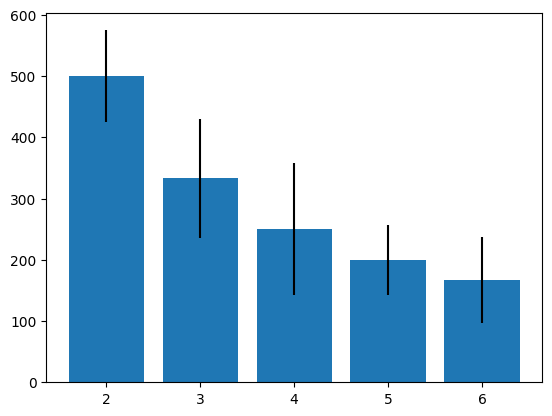

In [4]:
plt.bar(np.arange(5),height=[np.mean(list(d.values()))for d in l.values()],yerr=[np.std(list(d.values()))for d in l.values()])
plt.xticks(np.arange(5),list(l.keys()))

In [5]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

{'N': 6,
 'replicas': ['Server_148122',
  'Server_195839',
  'RandomServer814578',
  'RandomServer884333',
  'RandomServer390935',
  'RandomServer470157']}

In [6]:

if __name__ == "__main__":
    l={}
    for r in range(5):
        num_rep=requests.get("http://10.171.9.221:5000/rep").json()["message"]["N"]
        load = await asyncio.wait_for(sim_calls(1000),timeout=None)
        l[num_rep]=dict(load)
        print(l)

        if r<4:
            status=requests.delete("http://10.171.9.221:5000/rm",json={'n':1}).status_code
            if status==200:
                print("removed")
            else:
                print("can not remove")
            time.sleep(20)

Requests handled by each server instance:
{6: {'RandomServer390935': 260, 'Server_195839': 128, 'Server_148122': 259, 'RandomServer884333': 110, 'RandomServer814578': 192, 'RandomServer470157': 51}}
removed
Requests handled by each server instance:
{6: {'RandomServer390935': 260, 'Server_195839': 128, 'Server_148122': 259, 'RandomServer884333': 110, 'RandomServer814578': 192, 'RandomServer470157': 51}, 5: {'Server_148122': 317, 'RandomServer884333': 115, 'RandomServer814578': 265, 'RandomServer390935': 243, 'RandomServer470157': 60}}
removed
Requests handled by each server instance:
{6: {'RandomServer390935': 260, 'Server_195839': 128, 'Server_148122': 259, 'RandomServer884333': 110, 'RandomServer814578': 192, 'RandomServer470157': 51}, 5: {'Server_148122': 317, 'RandomServer884333': 115, 'RandomServer814578': 265, 'RandomServer390935': 243, 'RandomServer470157': 60}, 4: {'RandomServer814578': 247, 'RandomServer390935': 276, 'RandomServer470157': 160, 'Server_148122': 317}}
removed
Req

([<matplotlib.axis.XTick at 0x7fbac8cca5e0>,
 [Text(0, 0, '6'),
  Text(1, 0, '5'),
  Text(2, 0, '4'),
  Text(3, 0, '3'),
  Text(4, 0, '2')])

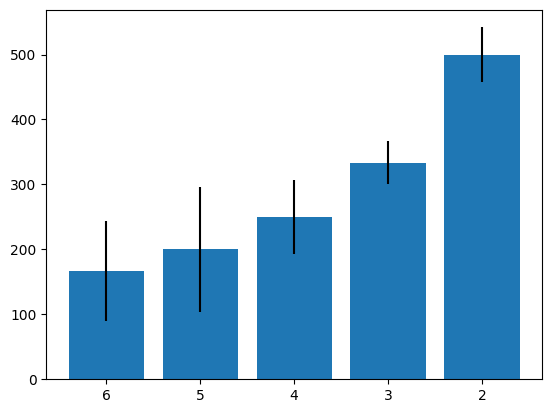

In [13]:
plt.bar(np.arange(5),height=[np.mean(list(d.values()))for d in l.values()],yerr=[np.std(list(d.values()))for d in l.values()])
plt.xticks(np.arange(5),list(l.keys()))

In [46]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

{'N': 2, 'replicas': ['Server_156924', 'Server_165816']}

In [29]:
requests.get("http://10.171.9.221:5000/rep").json()["message"]

{'N': 2, 'replicas': ['Server_156924', 'Server_165816']}

In [49]:
np.mean(list(l[6].values()))

166.66666666666666